1. Select glaciers which area larger than specific value 


In [25]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union


### 1. select glaciers in the HMA region.

In [50]:
path_rgi60_13 = 'data/glaciers/rgi60_13.gpkg'   ## Cental Asia
path_rgi60_14 = 'data/glaciers/rgi60_14.gpkg'   ## South Asia (West)
path_rgi60_15 = 'data/glaciers/rgi60_15.gpkg'   ## South Asia (East)
path_rgi60_hma_larger2 = 'data/glaciers/rgi60_hma_larger2.gpkg'


In [41]:
## Read data
rgi60_13 = gpd.read_file(path_rgi60_13)
rgi60_14 = gpd.read_file(path_rgi60_14)
rgi60_15 = gpd.read_file(path_rgi60_15)
rgi60_hma = pd.concat([rgi60_13 , rgi60_14, rgi60_15])
print(rgi60_hma.shape)
rgi60_hma.head()


(95536, 23)


,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-13.00001,G079494E34471N,20000810,-9999999,79.4939,34.4713,13,5,0.432,5678,...,312,683,0,0,0,0,9,9,None,"MULTIPOLYGON (((79.49945 34.47555, 79.49880 34..."
1,RGI60-13.00002,G077951E35545N,20020802,-9999999,77.9513,35.5452,13,5,0.367,5889,...,195,1307,0,0,0,0,9,9,None,"MULTIPOLYGON (((77.95519 35.55007, 77.95517 35..."
2,RGI60-13.00003,G077930E35519N,20020802,-9999999,77.9295,35.5188,13,5,0.070,5646,...,318,426,0,0,0,0,9,9,None,"MULTIPOLYGON (((77.92863 35.52057, 77.92864 35..."
3,RGI60-13.00004,G077924E35525N,20020802,-9999999,77.9237,35.5252,13,5,0.255,5698,...,39,605,0,0,0,0,9,9,None,"MULTIPOLYGON (((77.91713 35.52720, 77.91764 35..."
4,RGI60-13.00005,G077914E35531N,20020802,-9999999,77.9141,35.5309,13,5,0.261,5644,...,8,389,0,0,0,0,9,9,None,"MULTIPOLYGON (((77.91939 35.52980, 77.91938 35..."


In [42]:
### Select the glaciers which area larger than a specific value
rgi60_hma_larger2 = rgi60_hma.loc[rgi60_hma['Area'] > 2]
print(rgi60_hma_larger2.shape)
rgi60_hma_larger2.head()


(8099, 23)


,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
61,RGI60-13.00062,G078112E35641N,20020802,-9999999,78.1118,35.6407,13,5,2.222,5417,...,358,1532,0,0,1,0,9,9,None,"MULTIPOLYGON (((78.11967 35.64379, 78.11962 35..."
92,RGI60-13.00093,G078044E35588N,20020802,-9999999,78.0440,35.5883,13,5,2.019,5432,...,50,1219,0,0,0,0,9,9,None,"MULTIPOLYGON (((78.04739 35.58222, 78.04741 35..."
129,RGI60-13.00130,G077960E35607N,20020802,-9999999,77.9604,35.6074,13,5,2.439,5428,...,346,2145,0,0,1,0,9,9,None,"MULTIPOLYGON (((77.96617 35.61253, 77.96610 35..."
134,RGI60-13.00135,G077928E35552N,20020802,-9999999,77.9279,35.5521,13,5,7.489,5357,...,293,4204,0,0,0,0,9,9,None,"MULTIPOLYGON (((77.94123 35.55736, 77.94123 35..."
136,RGI60-13.00137,G077969E35599N,20020802,-9999999,77.9687,35.5987,13,5,2.224,5756,...,143,2668,0,0,1,0,9,9,None,"MULTIPOLYGON (((77.98019 35.59974, 77.98152 35..."


In [69]:
print(f'Number of the glaciers: {rgi60_hma.shape[0]}')
print(f'Area of the glaciers: {rgi60_hma.area.sum()}')
print(f'Number of the selected glaciers: {rgi60_hma_larger2.shape[0]}')
print(f'Area of the selected glaciers: {rgi60_hma_larger2.area.sum()}')


Number of the glaciers: 95536
Area of the glaciers: 9.733577837345853
Number of the selected glaciers: 8099
Area of the selected glaciers: 6.590218410206804


<Axes: >

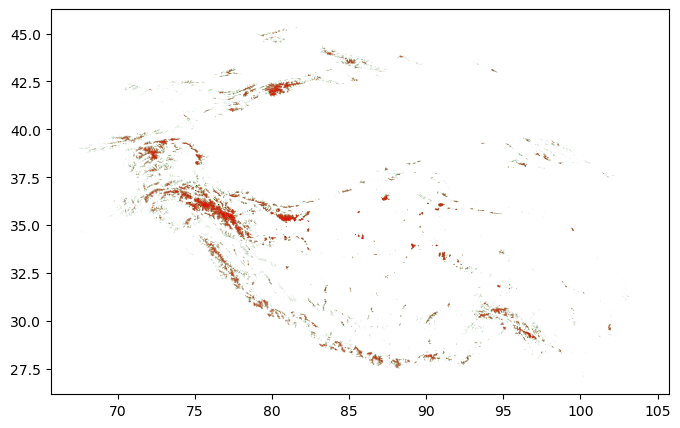

In [44]:
### Visualization
fig, ax = plt.subplots(1,1, figsize=(8,5))
rgi60_hma.plot(color='green', edgecolor='none', ax = ax)
rgi60_hma_larger2.plot(ax=ax, color='red', edgecolor='none')


In [51]:
### Write out
# rgi60_hma_larger2.to_file(path_rgi60_hma_larger2, driver='GPKG')
